In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
# 学習用データcsvデータを読み込み、train_dataに代入する
train_data = pd.read_csv('train.csv')

# 読み込んだ学習用データの先頭3行を表示
train_data.head(3)

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0


In [4]:
# 学習データの行数、列数を確認する。
print('読み込んだデータの行数、列数：', train_data.shape)

読み込んだデータの行数、列数： (55583, 29)


In [5]:
# 学習用データ内の欠損値の件数を確認する
print('読み込んだデータ全体の欠損値数：', train_data.isnull().sum().sum())

読み込んだデータ全体の欠損値数： 62827


In [6]:
# 欠損値のある列、列ごとの件数を確認する
train_data.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   147
bed_type                      0
bedrooms                     71
beds                         96
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              11908
host_has_profile_pic        148
host_identity_verified      148
host_response_rate        13704
host_since                  148
instant_bookable              0
last_review               11880
latitude                      0
longitude                     0
name                          0
neighbourhood              5160
number_of_reviews             0
property_type                 0
review_scores_rating      12556
room_type                     0
thumbnail_url              6145
zipcode                     716
y                             0
dtype: int64

In [7]:
# データ型の確認
train_data.dtypes

# Object型のデータが多いことがわかる。
# 現時点ではどのデータが不要なのかわからない。

id                          int64
accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
thumbnail_url              object
zipcode                    object
y                         float64
dtype: object

In [79]:
# Object型データをラベルエンコーディングする
# target_colにはObject型のデータ列名を格納
target_col = ['bed_type'
            ,'cancellation_policy'
            ,'city','cleaning_fee'
            ,'description'
            ,'first_review'
            ,'host_has_profile_pic'
            ,'host_identity_verified'
            ,'host_response_rate'
            ,'host_since'
            ,'instant_bookable'
            ,'last_review'
            ,'neighbourhood'
            ,'property_type'
            ,'room_type'
            ,'zipcode']

# ※amenities は非構造化データのため今回は除外、name,thumbnail_urlも除外

# ラベルエンコード後のデータを格納するtrain_dataのコピー
labeltrain = train_data.copy

# ラベルエンコーディング（LabelEncoder）
from sklearn.preprocessing import LabelEncoder

for col in target_col:
    le = LabelEncoder()
    # 対象列をラベルエンコーディング
    encoded = le.fit_transform(train_data[col].values)
    train_data[col] = encoded

# ラベルエンコード結果を確認
train_data.head()

# 複数列を一気にエンコードしたい場合はOrdinalEncoderを使ってもよい
# from sklearn.preprocessing import OrdinalEncoder

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,4,1.0,4.0,0,3,1,...,-118.154761,The Penthouse,607,1,0,60.0,1,NaN,555,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,4,1.0,1.0,2,2,1,...,-76.978190,Guest Bedroom in Brookland,72,9,17,100.0,1,https://a0.muscache.com/im/pictures/e4d8b51f-6...,331,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,4,1.0,1.0,2,4,1,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,82,27,0,83.0,1,https://a0.muscache.com/im/pictures/5ffecc9b-d...,737,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,4,1.0,1.0,2,5,1,...,-122.411906,BEST views + reviews! 5/5 stars*****,384,38,0,95.0,1,NaN,731,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,4,1.0,1.0,2,4,1,...,-73.974691,Charming 1-bedroom - UWS Manhattan,546,5,0,100.0,0,https://a0.muscache.com/im/pictures/92879730/5...,72,165.0


In [38]:
# 相関を確認
corrdata = train_data.corr().abs()
corrdata

,id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,y
id,1.000000,0.005027,0.005182,0.000583,0.002463,0.005736,0.002459,0.003900,0.006579,0.000568,...,0.000519,0.007358,0.005771,0.002616,0.004658,0.005248,0.002307,0.002785,0.008335,0.001129
accommodates,0.005027,1.000000,0.502278,0.075075,0.708510,0.806654,0.209681,0.101823,0.181381,0.001665,...,0.021146,0.079395,0.086365,0.025719,0.042320,0.172042,0.017824,0.460828,0.084784,0.522330
bathrooms,0.005182,0.502278,1.000000,0.041107,0.586366,0.524847,0.088825,0.079137,0.052675,0.002897,...,0.022641,0.135427,0.132046,0.028737,0.040262,0.256465,0.006698,0.115355,0.124827,0.456044
bed_type,0.000583,0.075075,0.041107,1.000000,0.055406,0.067520,0.039733,0.004100,0.037313,0.002501,...,0.028194,0.002161,0.004382,0.011585,0.006479,0.014957,0.002497,0.151761,0.007356,0.049579
bedrooms,0.002463,0.708510,0.586366,0.055406,1.000000,0.708230,0.130549,0.067552,0.106702,0.001470,...,0.001832,0.057502,0.074027,0.012499,0.033761,0.221043,0.009996,0.243714,0.093256,0.495830
beds,0.005736,0.806654,0.524847,0.067520,0.708230,1.000000,0.180810,0.068207,0.131844,0.000777,...,0.022875,0.080307,0.082434,0.020711,0.030914,0.177647,0.027839,0.319059,0.077206,0.435603
cancellation_policy,0.002459,0.209681,0.088825,0.039733,0.130549,0.180810,1.000000,0.018443,0.339265,0.000605,...,0.004359,0.010793,0.001764,0.000262,0.190236,0.026457,0.023716,0.177138,0.038493,0.081752
city,0.003900,0.101823,0.079137,0.004100,0.067552,0.068207,0.018443,1.000000,0.018230,0.013454,...,0.058432,0.013491,0.067891,0.032857,0.022674,0.101532,0.017856,0.058786,0.109830,0.008739
cleaning_fee,0.006579,0.181381,0.052675,0.037313,0.106702,0.131844,0.339265,0.018230,1.000000,0.002824,...,0.008350,0.061194,0.068876,0.024206,0.107712,0.033945,0.032284,0.211429,0.035526,0.029846
description,0.000568,0.001665,0.002897,0.002501,0.001470,0.000777,0.000605,0.013454,0.002824,1.000000,...,0.009640,0.016879,0.022539,0.010575,0.003680,0.026813,0.003812,0.028002,0.036335,0.021222


In [39]:
# 相関の内容の表示方法の変更
corr_y = pd.DataFrame({'列':corrdata.columns, '相関':corrdata['y']}, index=None)
corr_y = corr_y.reset_index(drop=True)
# 相関列の昇順、グラデーションを付けて表示
corr_y.sort_values(by='相関', ascending=False).style.background_gradient()

,列,相関
25,y,1.000000
1,accommodates,0.522330
4,bedrooms,0.495830
2,bathrooms,0.456044
5,beds,0.435603
23,room_type,0.379130
21,property_type,0.119541
6,cancellation_policy,0.081752
20,number_of_reviews,0.068944
22,review_scores_rating,0.065896


In [80]:
# 相関係数より、列を削除
dropped_df = train_data.drop(['cancellation_policy'
                            ,'number_of_reviews'
                            ,'review_scores_rating'
                            ,'longitude'
                            ,'host_response_rate'
                            ,'zipcode'
                            ,'bed_type'
                            ,'first_review'
                            ,'last_review'
                            ,'cleaning_fee'
                            ,'latitude'
                            ,'instant_bookable'
                            ,'neighbourhood'
                            ,'description'
                            ,'host_has_profile_pic'
                            ,'host_since'
                            ,'host_identity_verified'
                            ,'city'
                            ,'id'
                            ,'amenities'
                            ,'thumbnail_url'
                            ,'name'], axis = 1)
dropped_df.shape

(55583, 7)

In [68]:
# 再度NaNデータの確認（欠損値の確認）
dropped_df.isnull().sum()

accommodates       0
bathrooms        147
bedrooms          71
beds              96
property_type      0
room_type          0
y                  0
dtype: int64

In [83]:
# 欠損値の補完
# 列bathroomsの欠損値をbathroomsの最頻値で穴埋め
dropped_df['bathrooms'] = dropped_df['bathrooms'].fillna(dropped_df['bathrooms'].mode().iloc[0])  
# 列bedroomsの欠損値を最頻値で穴埋め
dropped_df['bedrooms'] = dropped_df['bedrooms'].fillna(dropped_df['bedrooms'].mode().iloc[0])  
# 列bedsの欠損値を最頻値で穴埋め
dropped_df['beds'] = dropped_df['beds'].fillna(dropped_df['beds'].mode().iloc[0])  

In [84]:
# 再度NaNデータの確認（欠損値の確認）
dropped_df.isnull().sum()

accommodates     0
bathrooms        0
bedrooms         0
beds             0
property_type    0
room_type        0
y                0
dtype: int64

In [85]:
#ダミー変数化
dropped_df = pd.get_dummies(dropped_df, drop_first = True)

In [86]:
# 特徴量の列を抜き出す
test_x = dropped_df[['accommodates', 'bathrooms','bedrooms', 'beds', 'property_type','room_type']]
test_x.head()

,accommodates,bathrooms,bedrooms,beds,property_type,room_type
0,6,2.0,1.0,4.0,0,1
1,2,1.0,1.0,1.0,17,1
2,2,2.0,1.0,1.0,0,1
3,2,1.0,1.0,1.0,0,1
4,2,1.0,1.0,1.0,0,0


In [87]:
#正解データ
correct = dropped_df[['y']]
correct

,y
0,138.0
1,42.0
2,65.0
3,166.0
4,165.0
...,...
55578,340.0
55579,30.0
55580,100.0
55581,38.0


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# データの分割
x_train, x_test, y_train, y_test = train_test_split(test_x, correct, test_size = 0.3, random_state = 0)

In [89]:
# sklearn.preprocessing から StandardScaler をインポートする 
from sklearn.preprocessing import StandardScaler

# スケーラーを生成し、変数sc_model_xに代入する
sc_model_x = StandardScaler()

# スケーラーに、標準化で使用するx_trainの情報を取得させる
sc_model_x.fit(x_train)

# x_trainを標準化し、変数sc_xに代入する
sc_x = sc_model_x.transform(x_train)

# 標準化した結果を表示する
sc_x

array([[-0.53516886, -0.40942131, -0.31174577, -0.56680651, -0.67137559,
         0.94853969],
       [ 0.86339938, -0.40942131,  2.07335   ,  1.03108559, -0.67137559,
        -0.85174237],
       [-1.00135828, -0.40942131, -0.31174577, -0.56680651, -0.67137559,
         0.94853969],
       ...,
       [ 1.32958879,  1.34196831, -0.31174577,  1.83003164,  1.33076141,
         0.94853969],
       [-0.06897945, -0.40942131, -0.31174577, -0.56680651,  1.33076141,
         0.94853969],
       [ 1.32958879,  1.34196831,  2.07335   ,  1.83003164, -0.67137559,
        -0.85174237]])

In [90]:
# sc_x(array型)の平均値、標準偏差を確認する。
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)

# tmp_dfの平均値を表示する
print('平均値')
print(tmp_df.mean())


# tmp_dfの標準偏差を表示する
print('標準偏差')
print(tmp_df.std())

平均値
accommodates     8.283643e-16
bathrooms       -2.737607e-16
bedrooms         1.648214e-15
beds            -1.420867e-15
property_type   -3.842808e-16
room_type        8.487294e-16
dtype: float64
標準偏差
accommodates     1.000013
bathrooms        1.000013
bedrooms         1.000013
beds             1.000013
property_type    1.000013
room_type        1.000013
dtype: float64


In [91]:
# スケーラーを生成し、変数sc_model_yに代入する
sc_model_y = StandardScaler()

# スケーラーに、標準化で使用するy_trainの情報を取得させる
sc_model_y.fit(y_train)

# y_trainを標準化し、変数sc_yに代入する
sc_y = sc_model_y.transform(y_train)

# 標準化した結果を表示する
sc_y

array([[-0.36422768],
       [ 1.43520822],
       [-0.6631373 ],
       ...,
       [-0.1191218 ],
       [-0.50172611],
       [ 2.02704926]])

In [92]:
# 線形回帰モデルのオブジェクトを生成する
model = LinearRegression()

# 線形回帰モデルに、標準化したデータ（特徴量sc_x、正解データsc_y）を学習させる
model.fit(sc_x, sc_y)

LinearRegression()

In [93]:
# 検証データの特徴量x_valを訓練データの特徴量の情報で標準化し、変数sc_x_valに代入する
sc_x_val = sc_model_x.transform(x_test)

# 検証データの正解データy_valを訓練データの正解データの情報で標準化し、変数sc_y_valに代入する
sc_y_val = sc_model_y.transform(y_test)

# 標準化した検証データで決定係数を計算する
model.score(sc_x_val, sc_y_val)

0.374689833651596

決定係数は全然よくなかった…。

## **決定係数を上げるためのヒント**

In [97]:
# 決定係数がイマイチなのでアメニティ列をきれいにできないか検討
train_data = pd.read_csv('train.csv')
# {}と"を取り除く
train_data['amenities'] = train_data['amenities'].str.replace("[{}]", "").str.replace('"', "")
train_data['amenities'].head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0    TV,Wireless Internet,Kitchen,Free parking on p...
1    TV,Cable TV,Internet,Wireless Internet,Air con...
2    TV,Internet,Wireless Internet,Kitchen,Indoor f...
3    TV,Cable TV,Internet,Wireless Internet,Air con...
4    TV,Internet,Wireless Internet,Air conditioning...
5    Wireless Internet,Air conditioning,Kitchen,Hea...
6    Internet,Wireless Internet,Kitchen,Free parkin...
7    TV,Cable TV,Internet,Wireless Internet,Air con...
8    Wireless Internet,Air conditioning,Pets allowe...
9    Wireless Internet,Air conditioning,Heating,Loc...
Name: amenities, dtype: object

In [103]:
# Matplotを使用する
%matplotlib inline
import matplotlib.pyplot as plt


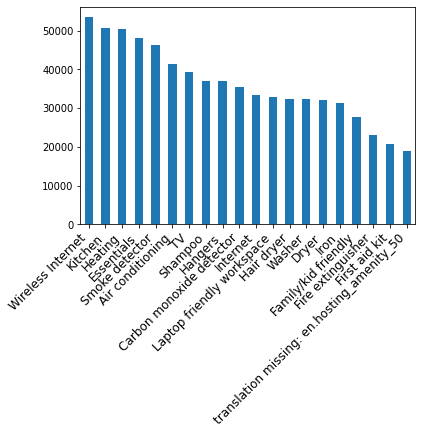

In [104]:
# アメニティの中でよくある20アイテムを表示
pd.Series(np.concatenate(train_data['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
# set_xticklabels : matplotlibで描画したグラフの目盛り文字列を変更する際に使用
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

In [ ]:
# 上記から、Wifi, heating, essential, kitchen and smoke detector あたりがよくあるアメニティであることがわかる。

In [101]:
# CountVectorizer：単語の出現頻度を数えることができる
from sklearn.feature_extraction.text import CountVectorizer

train_data['amenities'] = train_data['amenities'].str.replace("[{}]", "").str.replace('"', "")
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(train_data['amenities'])
# 結果をPandasのDataFrame型にして代入
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
# できているか確認
df_amenities.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,smooth pathway to front door,24-hour check-in,accessible-height bed,accessible-height toilet,air conditioning,air purifier,baby bath,baby monitor,babysitter recommendations,...,waterfront,well-lit path to entrance,wheelchair accessible,wide clearance to bed,wide clearance to shower & toilet,wide doorway,wide entryway,wide hallway clearance,window guards,wireless internet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
